# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_pre_proc.csv'

file_tag = "Google Merch Store 2024-2025"


## DSLabs

In [2]:
%run "scripts/dslabs_functions.py"


# data functions

In [3]:
%run "scripts/data_functions.py"

data_functions loaded


# Load

In [4]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)




else:
    data=pd.read_csv(filepath, decimal=".", index_col='Date', parse_dates=True,  infer_datetime_format=True)




data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 67 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Sessions                                  427 non-null    int64  
 1   Bounce rate                               427 non-null    float64
 2   Seven-day active users                    427 non-null    int64  
 3   28-day active users                       427 non-null    int64  
 4   New users                                 427 non-null    int64  
 5   Scrolled users                            330 non-null    float64
 6   Engaged sessions                          427 non-null    int64  
 7   Views                                     427 non-null    int64  
 8   Event count                               427 non-null    int64  
 9   Events per session                        427 non-null    float64
 10  Item-list view even

In [5]:
series: Series = data['Sessions']


# Dimensionality

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


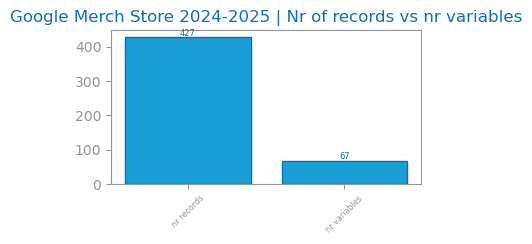

In [6]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": data.shape[0], "nr variables": data.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

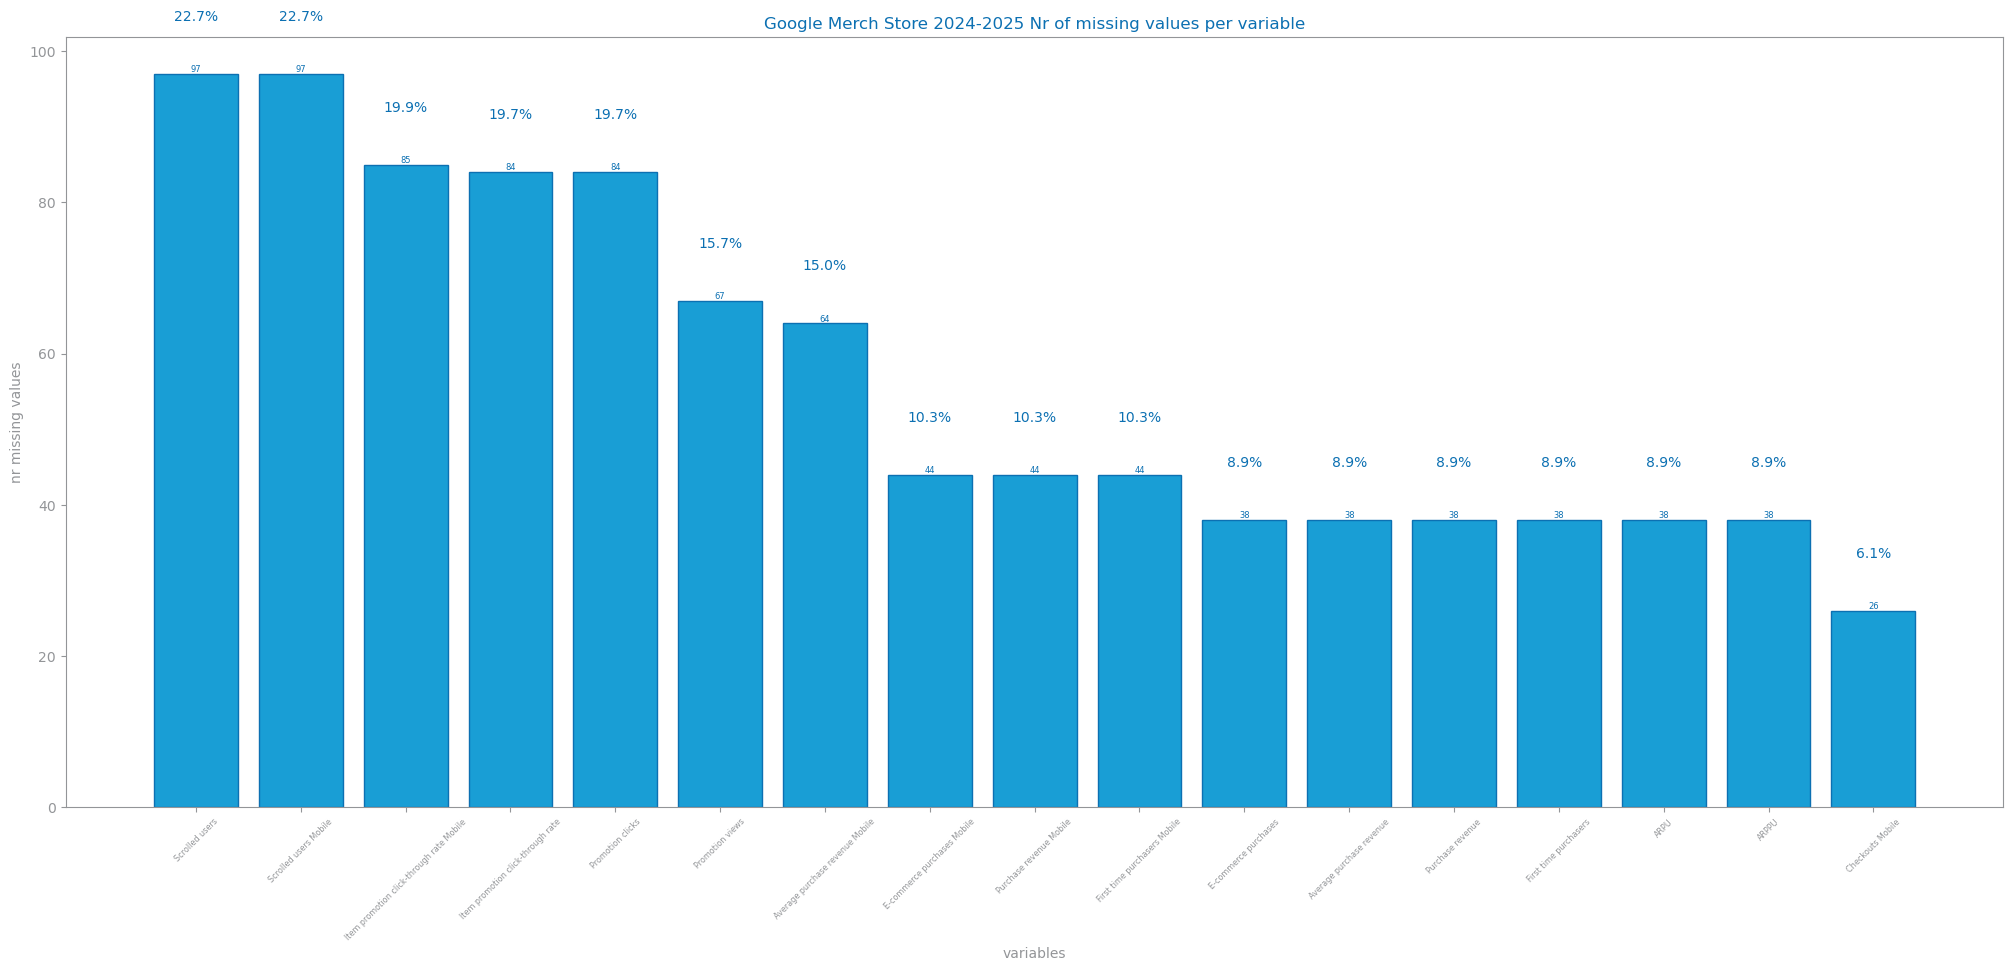

In [7]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(data)

for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

## Variables Type

In [8]:
data.dtypes


Sessions                     int64
Bounce rate                float64
Seven-day active users       int64
28-day active users          int64
New users                    int64
                            ...   
day_of_week_nr               int64
is_weekend                   int64
is_holiday                   int64
is_major_event_day           int64
is_commercial_event_day      int64
Length: 67, dtype: object

In [9]:
from pandas import Series, to_numeric, to_datetime


def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c].astype("bool")
        else:
            try:
                to_numeric(df[c], errors="raise")
                variable_types["numeric"].append(c)
            except ValueError:
                try:
                    df[c] = to_datetime(df[c], errors="raise")
                    variable_types["date"].append(c)
                except ValueError:
                    variable_types["symbolic"].append(c)

    return variable_types


variable_types: dict[str, list] = get_variable_types(data)
print(variable_types)

{'numeric': ['Sessions', 'Bounce rate', 'Seven-day active users', '28-day active users', 'New users', 'Scrolled users', 'Engaged sessions', 'Views', 'Event count', 'Events per session', 'Item-list view events', 'Item view events', 'Item promotion click-through rate', 'Add to baskets', 'Checkouts', 'E-commerce purchases', 'Average purchase revenue', 'Purchase revenue', 'First time purchasers', 'Average session duration', 'ARPU', 'ARPPU', 'DAU/MAU', 'DAU/WAU', 'Sessions per user', 'Views per user', 'Total users', 'Promotion views', 'Promotion clicks', 'One-day active users', 'Sessions Mobile', 'Bounce rate Mobile', 'Seven-day active users Mobile', '28-day active users Mobile', 'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile', 'Views Mobile', 'Event count Mobile', 'Events per session Mobile', 'Item-list view events Mobile', 'Item view events Mobile', 'Item promotion click-through rate Mobile', 'Add to baskets Mobile', 'Checkouts Mobile', 'E-commerce purchases Mobile'

### variables per type plot

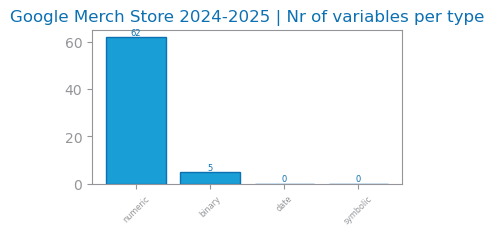

In [10]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

# Data Distribution

## describe

In [11]:
summary5: DataFrame = data.describe(include="all")
summary5

Sessions  Bounce rate  Seven-day active users  28-day active users  \
count    427.000000   427.000000              427.000000           427.000000   
mean    2096.981265     0.477794            10567.112412         38404.140515   
std     1078.436107     0.100940             3632.601576         12293.299375   
min       22.000000     0.165997              780.000000           780.000000   
25%     1463.000000     0.412334             8326.500000         30502.500000   
50%     1984.000000     0.478213            10800.000000         40024.000000   
75%     2545.500000     0.545998            12269.500000         48328.000000   
max    11239.000000     0.818182            20447.000000         60050.000000   

         New users  Scrolled users  Engaged sessions         Views  \
count   427.000000      330.000000        427.000000    427.000000   
mean   1208.053864      831.678788       1129.370023   7518.901639   
std     627.503784      645.372110        776.451498   6176.753658   
min       4.000000      213.000000          4.000000     20.000000   
25%     876.500000      471.250000        662.500000   4267.000000   
50%    1177.000000      724.000000        999.000000   6563.000000   
75%    1442.000000      982.000000       1346.500000   9370.500000   
max    7734.000000     6455.000000       8453.000000  94665.000000   

         Event count  Events per session  ...  Sessions other  \
count     427.000000          427.000000  ...      427.000000   
mean    29223.332553           13.742619  ...        1.653396   
std     23458.915577            3.952863  ...        2.798685   
min       401.000000            4.343862  ...        0.000000   
25%     16799.000000           11.470473  ...        0.000000   
50%     25377.000000           14.038885  ...        0.000000   
75%     36457.500000           16.004337  ...        3.000000   
max    353391.000000           34.000000  ...       14.000000   

       Sessions referral      season  commercial_season  week_of_month  \
count         427.000000  427.000000         427.000000     427.000000   
mean          164.238876    0.698949          -0.470871       3.227166   
std           264.319534    1.652479           1.457896       1.308123   
min             0.000000   -1.570796          -2.094395       1.000000   
25%            36.000000    0.000000          -1.047198       2.000000   
50%            75.000000    0.000000          -1.047198       3.000000   
75%           181.000000    1.570796           0.000000       4.000000   
max          2663.000000    3.141593           3.141593       6.000000   

       day_of_week_nr  is_weekend  is_holiday  is_major_event_day  \
count      427.000000  427.000000  427.000000          427.000000   
mean         3.000000    0.285714    0.028103            0.018735   
std          2.002346    0.452284    0.165461            0.135748   
min          0.000000    0.000000    0.000000            0.000000   
25%          1.000000    0.000000    0.000000            0.000000   
50%          3.000000    0.000000    0.000000            0.000000   
75%          5.000000    1.000000    0.000000            0.000000   
max          6.000000    1.000000    1.000000            1.000000   

       is_commercial_event_day  
count               427.000000  
mean                  0.004684  
std                   0.068358  
min                   0.000000  
25%                   0.000000  
50%                   0.000000  
75%                   0.000000  
max                   1.000000  

[8 rows x 67 columns]

## Numeric Variables

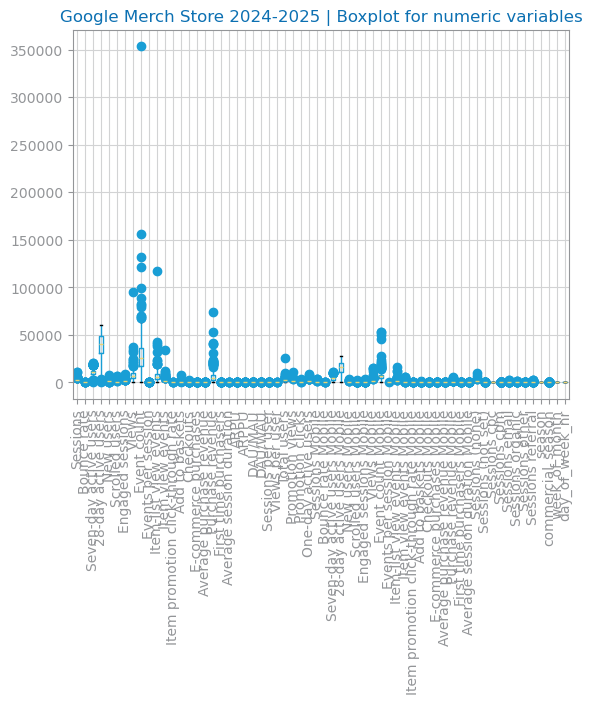

In [12]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    data[numeric].boxplot(rot=90)
    title(f'{file_tag} | Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_global_boxplot.png")
    show()
else:
    print("There are no numeric variables.")

# multivariate chart

In [13]:
print("Nr. Records = ", data.shape)
print("First timestamp", data.index[0])
print("Last timestamp", data.index[-1])


target = "Sessions"

not_symbolic_data=data[variable_types["numeric"] + variable_types["date"]+variable_types["binary"]]

plot_ts_multivariate_chart(not_symbolic_data, title=f"{file_tag} {target}")
show()

Nr. Records =  (427, 67)
First timestamp 2024-01-04 00:00:00
Last timestamp 2025-03-05 00:00:00


## numeric variables distribution breakdown

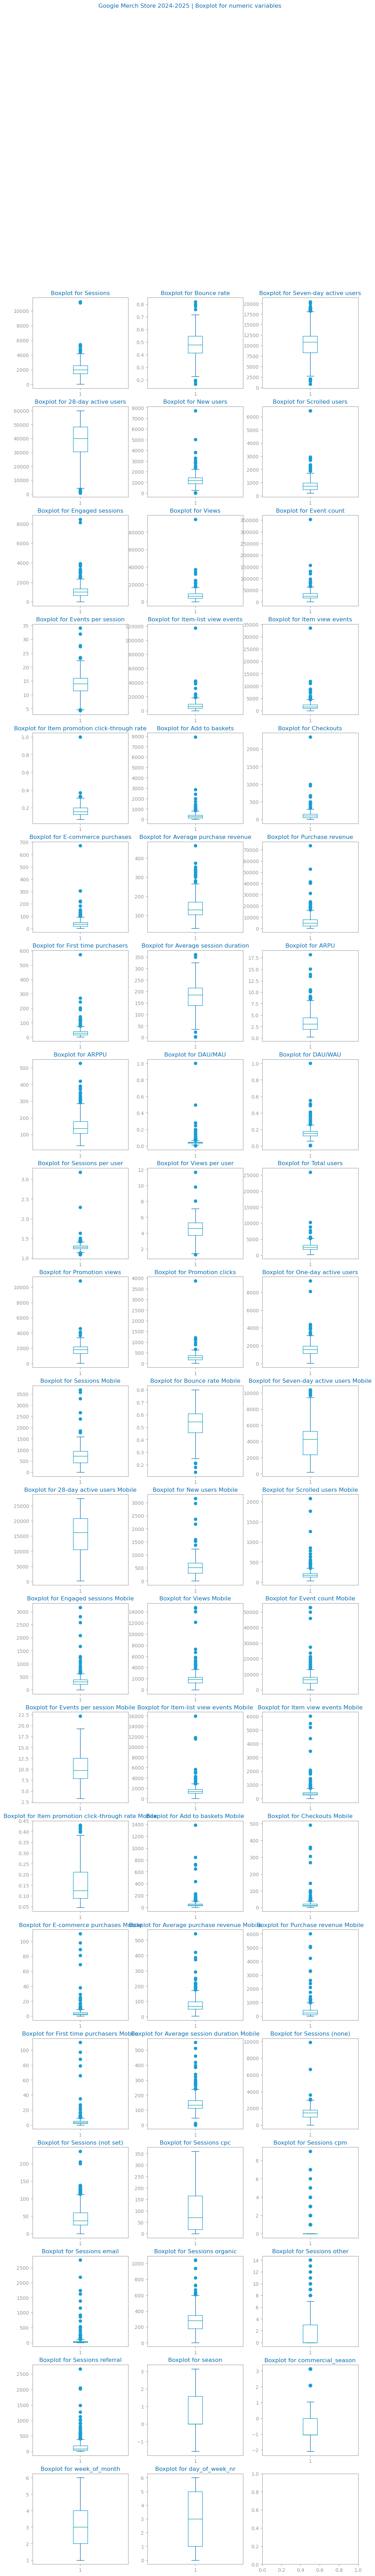

In [14]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT

if [] != numeric:
    rows: int
    cols: int
    rows, cols = define_grid(len(numeric))
    fig: Figure
    axs: ndarray
    title: f'{file_tag} Boxplot for numeric variables'
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    
    fig.suptitle(f'{file_tag} | Boxplot for numeric variables')

    
    i, j = 0, 0
    for n in range(len(numeric)):
        axs[i, j].set_title("Boxplot for %s" % numeric[n])
        axs[i, j].boxplot(data[numeric[n]].dropna().values)
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_single_boxplots.png")
    show()
else:
    print("There are no numeric variables.")

# Correlation Analysis

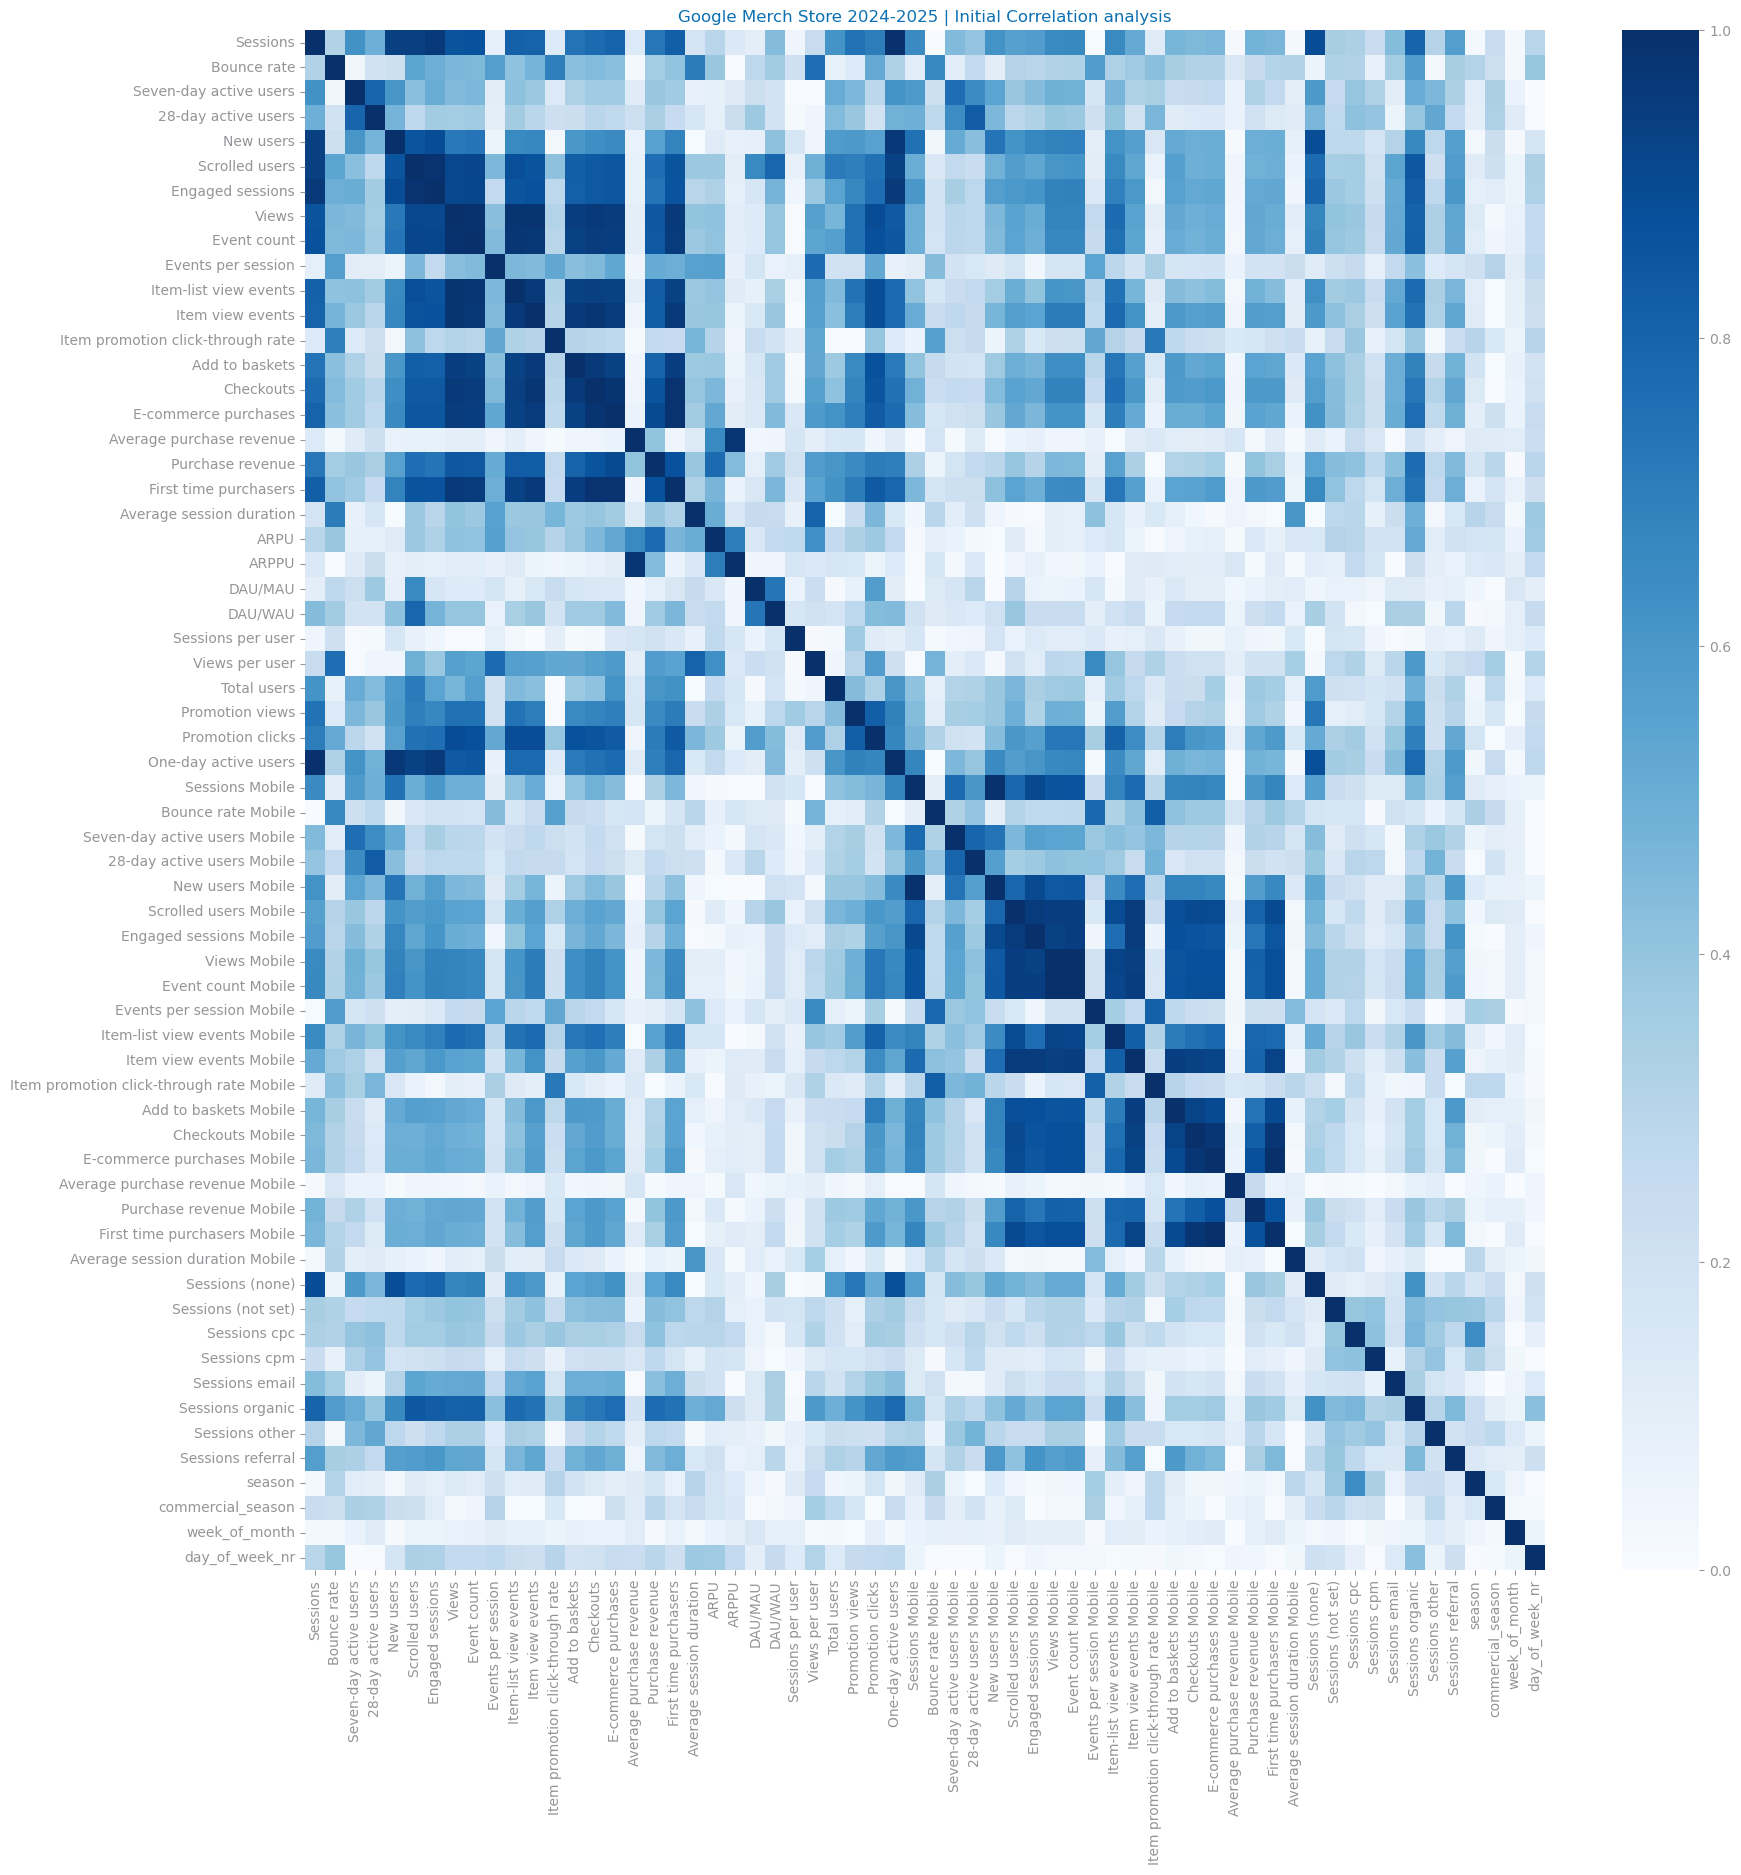

In [15]:
from seaborn import heatmap
from dslabs_functions import get_variable_types
from matplotlib.pyplot import figure, title, savefig, show

variables_types: dict[str, list] = get_variable_types(data)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = data[numeric].corr().abs()

figure(figsize=(20, 20))  # Increase the figure size
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)

title(f'{file_tag} | Initial Correlation analysis')

savefig(f"images/{file_tag}_correlation_analysis.png")
show()

# Series analysis

## Distribution

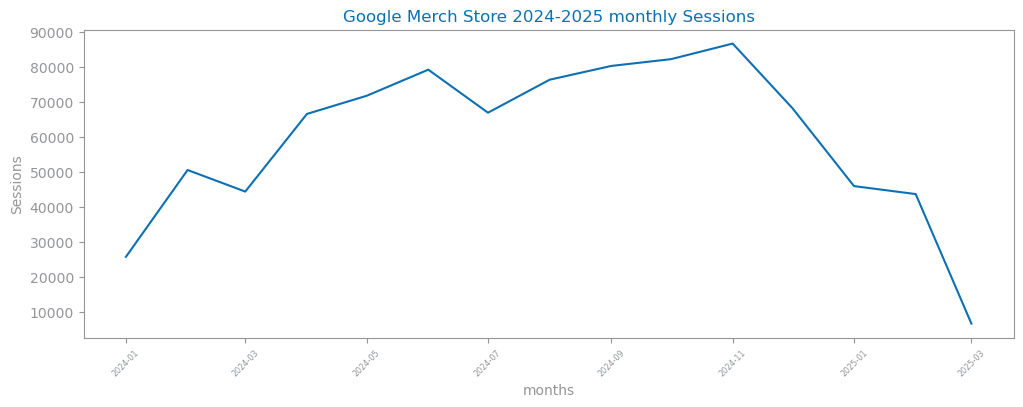

In [16]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} monthly {target}",
)
show()

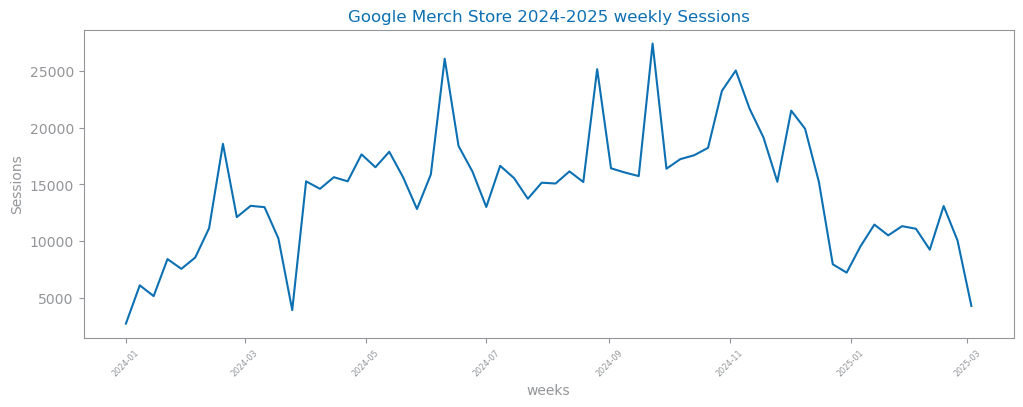

In [17]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

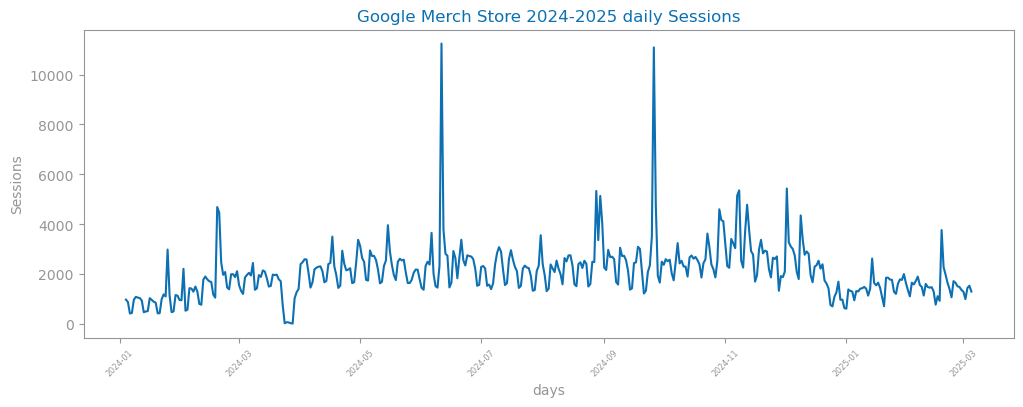

In [18]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} daily {target}",
)
show()

## Distribution summary 5

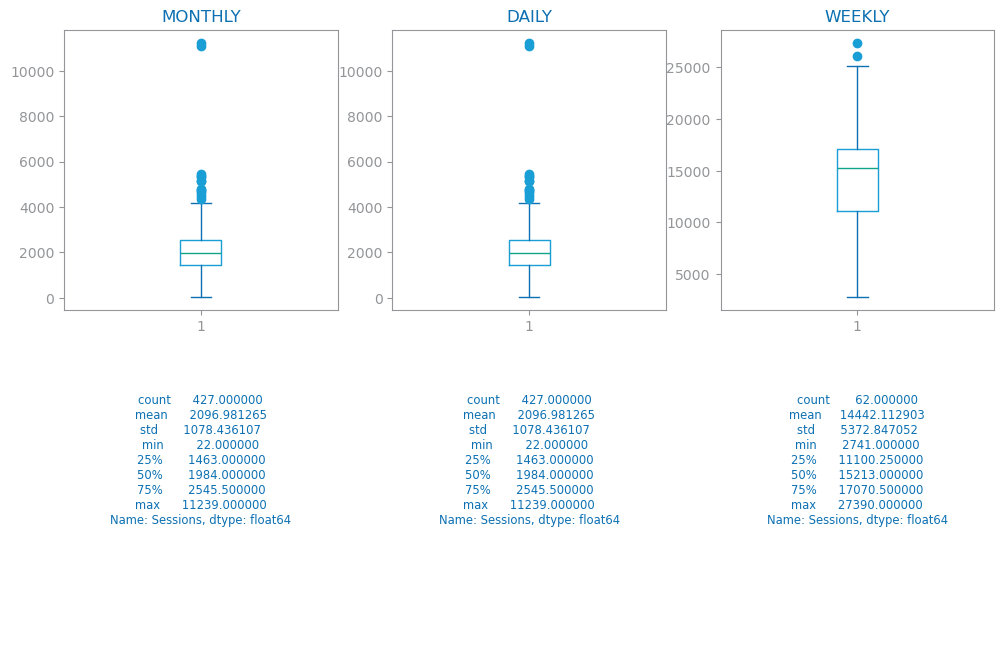

In [19]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels
fig: Figure
axs: array
fig, axs = subplots(2, 3, figsize=(3 * HEIGHT, 2 * HEIGHT))

set_chart_labels(axs[0, 0], title="MONTHLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="DAILY")
axs[0, 1].boxplot(ss_days)
set_chart_labels(axs[0, 2], title="WEEKLY")
axs[0, 2].boxplot(ss_weeks)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 1].grid(False)
axs[1, 1].set_axis_off()

# Add descriptions below each boxplot
descriptions = [
    str(series.describe()),
    str(ss_days.describe()),
    str(ss_weeks.describe())
]

for i, ax in enumerate(axs.flat[:3]):
    ax.text(0.5, -0.3, descriptions[i], transform=ax.transAxes, fontsize="small", ha="center", va="top")

# axs[1, 2].text(0.5, 0.5, str(series.describe()), transform=axs[1, 2].transAxes, fontsize="small", ha="center", va="center", wrap=True)
axs[1, 2].set_axis_off()

show()


## Variables Distribution

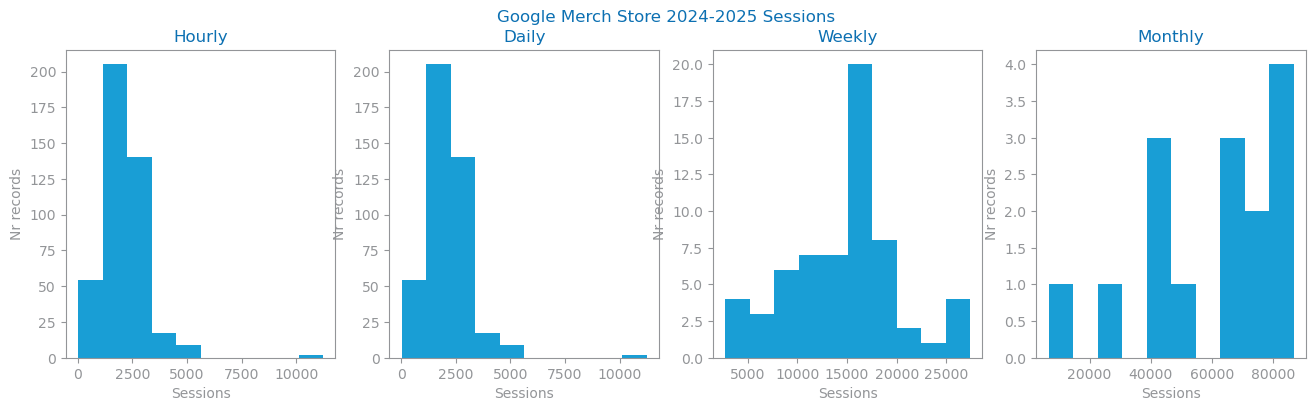

In [20]:

grans: list[Series] = [series, ss_days, ss_weeks, ss_months]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()

## Stationary

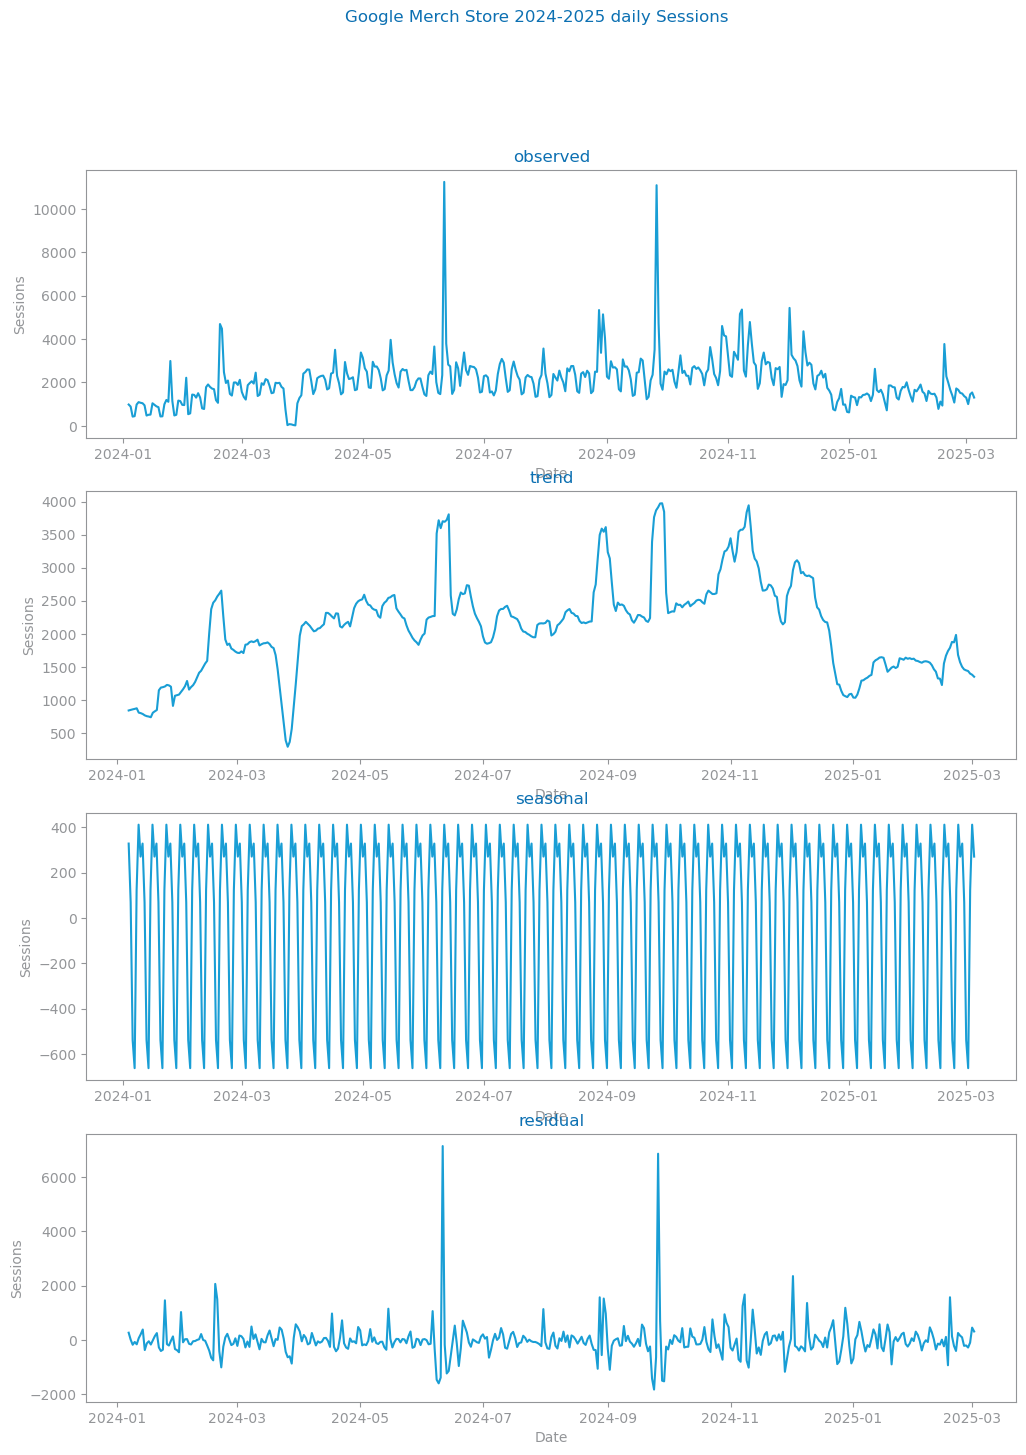

In [21]:


plot_components(
    series,
    title=f"{file_tag} daily {target}",
    x_label=series.index.name,
    y_label=target,
)
show()

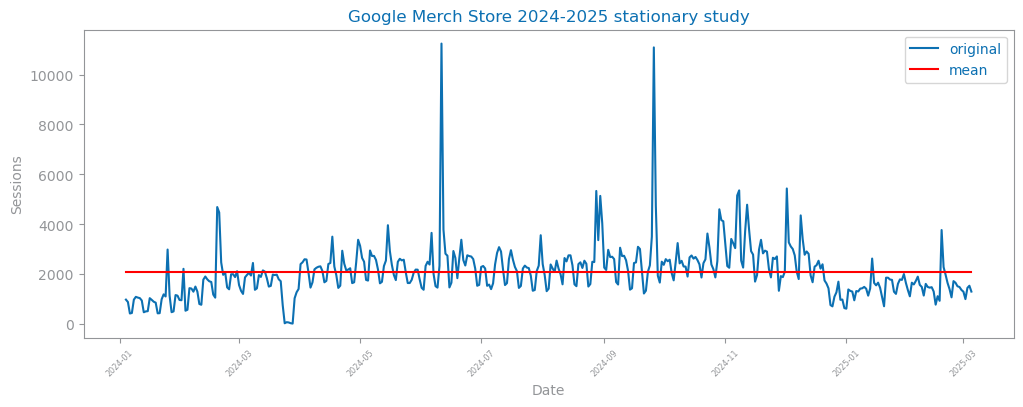

In [22]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
)
n: int = len(series)
plot(series.index, [series.mean()] * n, "r-", label="mean")
legend()
show()

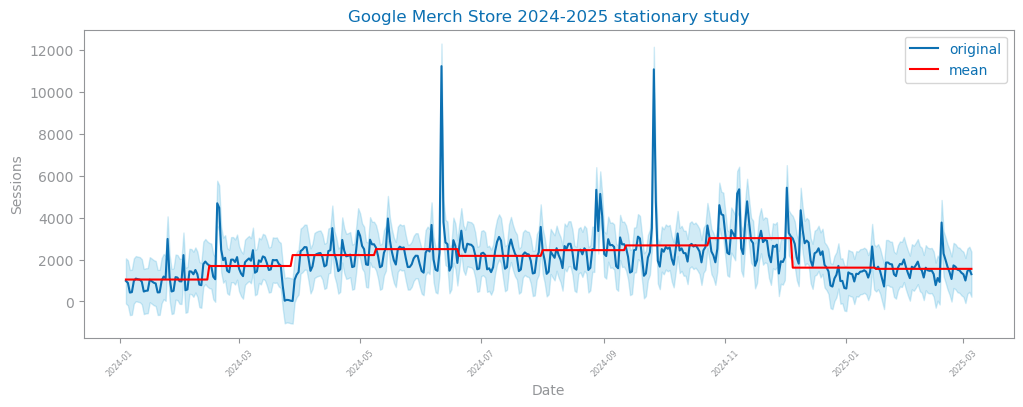

In [23]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = series[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} stationary study",
    name="original",
    show_stdev=True,
)
n: int = len(series)
plot(series.index, mean_line, "r-", label="mean")
legend()
show()

In [24]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(series: Series) -> bool:
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series {('is' if eval_stationarity(series) else 'is not')} stationary")

ADF Statistic: -3.788
p-value: 0.003
Critical Values:
	1%: -3.446
	5%: -2.868
	10%: -2.570
The series is stationary


## Autocorrelation

<Axes: ylabel='Sessions'>

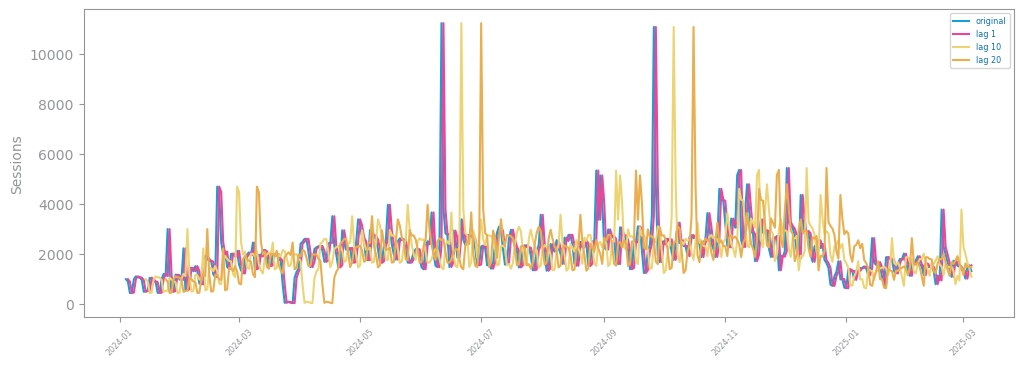

In [25]:


figure(figsize=(3 * HEIGHT, HEIGHT))

# available in data_functions.py
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, ylabel=target)

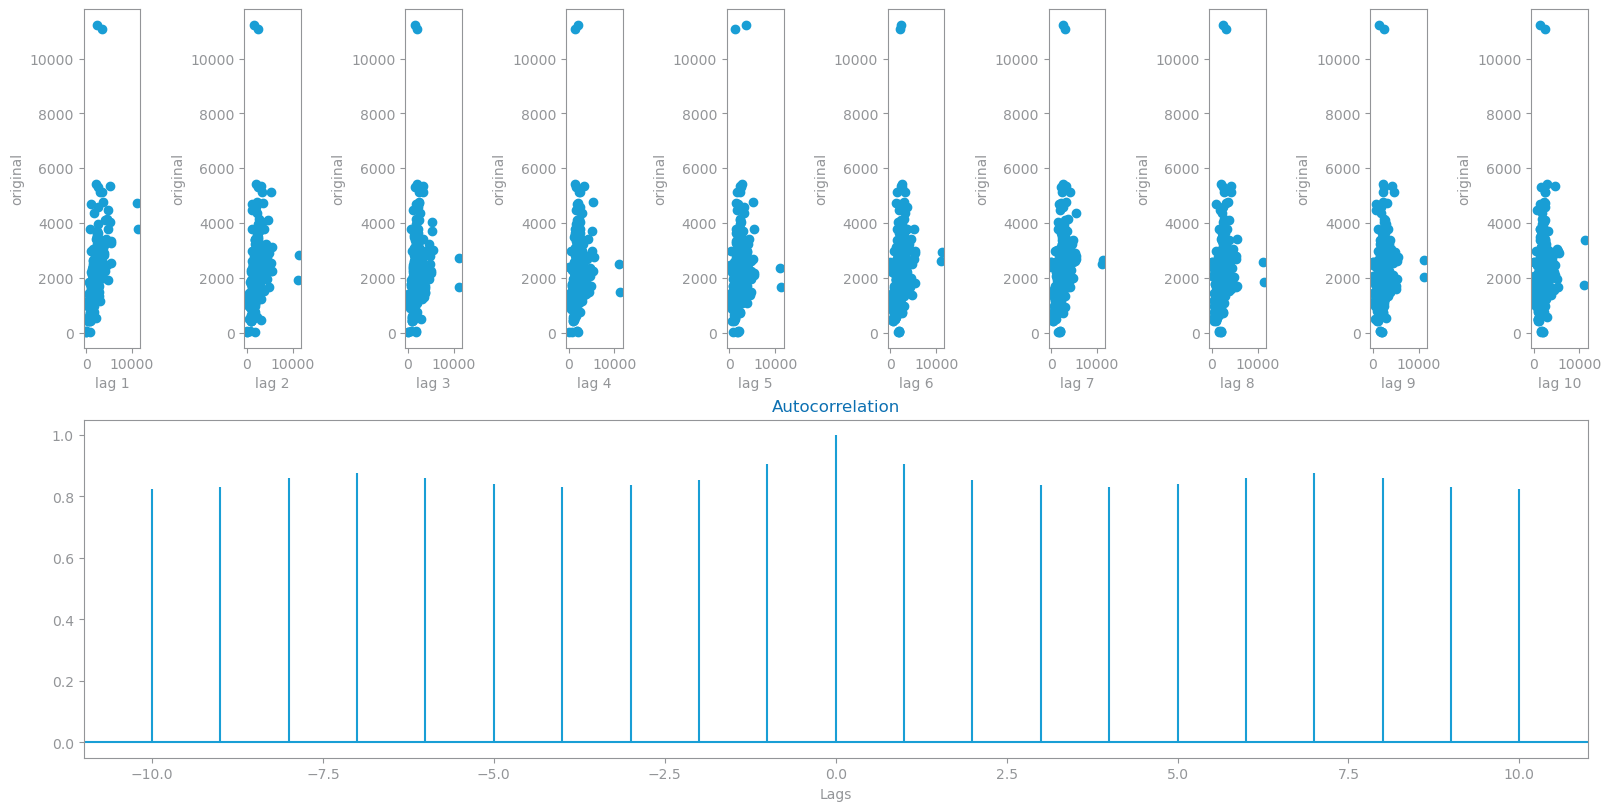

In [26]:
# available in data_functions.py


autocorrelation_study(series, 10, 1)